In [3]:
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import re
import cv2

In [7]:
with open('./val_rom3_bs.json') as rf:
    cap_dict = json.load(rf)
with open('./val_hum3_bs.json') as rf:
    cap_dict2 = json.load(rf)
with open('./val_act3_bs.json') as rf:
    cap_dict3 = json.load(rf)

In [8]:
cap_dict = {int(item['image_id']): item for item in cap_dict}
cap_dict2 = {int(item['image_id']): item for item in cap_dict2}
cap_dict3 = {int(item['image_id']): item for item in cap_dict3}

In [9]:
F30_IM_DIR = "/home/luoyy16/datasets-large/flickr30k-images"

Ground truth rom:  a child wearing crocs sits on a swing in a wooded area at the end of long camping trip with family .
Ground truth hum:  the sun breaks through the trees as a child rides a swing to outer space .
Ground truth act:  a child wearing crocs sits on a swing in a wooded area .
Description rom: a girl is playing with a water in a water fountain to win the game .
Description hum: a girl is being splashed by an invisible boy playing in a pool .
Description act: a girl is playing in a pool with a net , enjoying the happiness of childhood .


(-0.5, 373.5, 499.5, -0.5)

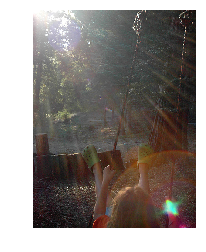

In [10]:
# choose random image
ran_key = np.random.choice(list(cap_dict.keys()), 1)[0]
c_dict = cap_dict[ran_key]
c_dict2 = cap_dict2[ran_key]
c_dict3 = cap_dict3[ran_key]
print("Ground truth rom: ", c_dict['ground_truth'])
print("Ground truth hum: ", c_dict2['ground_truth'])
print("Ground truth act: ", c_dict3['ground_truth'])
print("Description rom: {}".format(c_dict['caption']))
print("Description hum: {}".format(c_dict2['caption']))
print("Description act: {}".format(c_dict3['caption']))
img = plt.imread(os.path.join(F30_IM_DIR, str(c_dict['image_id']) + '.jpg'))
plt.imshow(img)
plt.axis('off')

In [4]:
# exploring SentiCap
S_CAP_JSON = '/home/luoyy16/datasets-large/senticap_dataset/data/senticap_dataset.json'

In [5]:
with open(S_CAP_JSON, 'r') as rf:
    scap = json.load(rf)

In [8]:
scap['images'][0]

{'filename': 'COCO_val2014_000000389081.jpg',
 'imgid': 31369,
 'sentences': [{'raw': 'a plate of delicious food including French fries.',
   'sentiment': 1,
   'tokens': ['a',
    'plate',
    'of',
    'delicious',
    'food',
    'including',
    'french',
    'fries'],
   'word_sentiment': [0.0, 0.0, 0.0, 1, 1, 0.0, 0.0, 0.0]},
  {'raw': 'French fries are not a healthy food but it is an excellent food for teenagers.',
   'sentiment': 1,
   'tokens': ['french',
    'fries',
    'are',
    'not',
    'a',
    'healthy',
    'food',
    'but',
    'it',
    'is',
    'an',
    'excellent',
    'food',
    'for',
    'teenagers'],
   'word_sentiment': [0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    1,
    1,
    0.0,
    0.0,
    0.0,
    0.0,
    1,
    1,
    0.0,
    0.0]},
  {'raw': 'The plate has one of my favorite foods on it, French fries.',
   'sentiment': 1,
   'tokens': ['the',
    'plate',
    'has',
    'one',
    'of',
    'my',
    'favorite',
    'foods',
    'on',
    'it